# PyTorch Custom Datasets

A custom dataset is a collection of data relating to a specific problem you're working on. In essence, a custom dataset can be comprised of almost anything.

PyTorch includes many existing functions to load in various custom datasets in the `TorchVision`, `TorchText`, `TorchAudio` and `TorchRec` domain libraries.

It is totally possible to make a custom dataset, build a model and, then, predict things with it. But before this, it is necessary some few pre process to make this dataset comparable with PyTorch.

## 0. Importing LIbraries and Frameworks & Setting up device-agnostic code

In [4]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print("PyTorch version: ",torch.__version__)
print("CUDA Available:", torch.cuda.is_available())
print("PyTorch-Cuda version: ",torch.version.cuda) 
print("Device name: ", torch.cuda.get_device_name(0))

PyTorch version:  2.5.1
CUDA Available: True
PyTorch-Cuda version:  12.4
Device name:  NVIDIA GeForce GTX 1650


## 1. Getting data

The data used here is a subset of the Food101 dataset. Originally, FOod101 starts with 101 different classes and 1000 images per class (750 fro training, 250 for test).

The subset here used starts with 3 classses of food and only 10% of the images (75% for training, 25% for test).

It's important to try thing on a small scale and then increase the scale when necessary while work on ML projects - the whole point is to speed up how fast to experiment.

In [6]:
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it 
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)
    
    # Download 
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...") 
        zip_ref.extractall(image_path)

data/pizza_steak_sushi directory exists.


## 2. Data preparation & exploration

In [8]:
import os
def walk_through_dir(dir_path):
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

In [9]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'


In [10]:
# Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

### 2.1 Visualizing images


1. Get all of the image paths using pathlib.Path.glob() to find all of the files ending in .jpg.
2. Pick a random image path using Python's random.choice().
3. Get the image class name using pathlib.Path.parent.stem.
4. And since we're working with images, we'll open the random image path using PIL.Image.open() (PIL stands for Python Image Library).
5. We'll then show the image and print some metadata.


data/pizza_steak_sushi/train/steak/3142045.jpg
steak
Random image path: data/pizza_steak_sushi/train/steak/3142045.jpg
Image class: steak
Image height: 512
Image width: 512


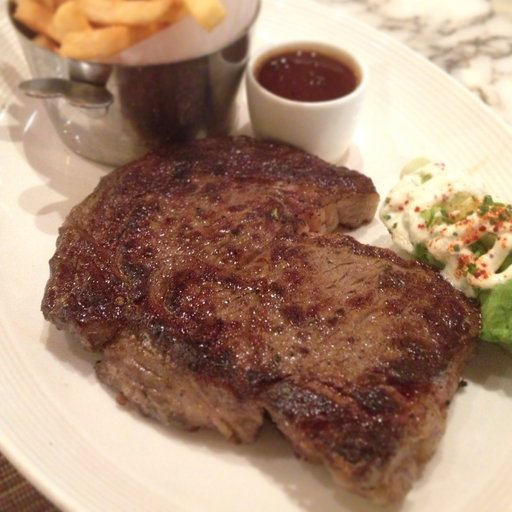

In [12]:
import random
from PIL import Image

# Set seed
# random.seed(42)

# 1. get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Pick a random image path
random_image_path = random.choice(image_path_list)
print(random_image_path)

# 3. Get the image class from the path name (the image of the directory where the image is stored)
image_class = random_image_path.parent.stem
print(image_class)

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadate
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

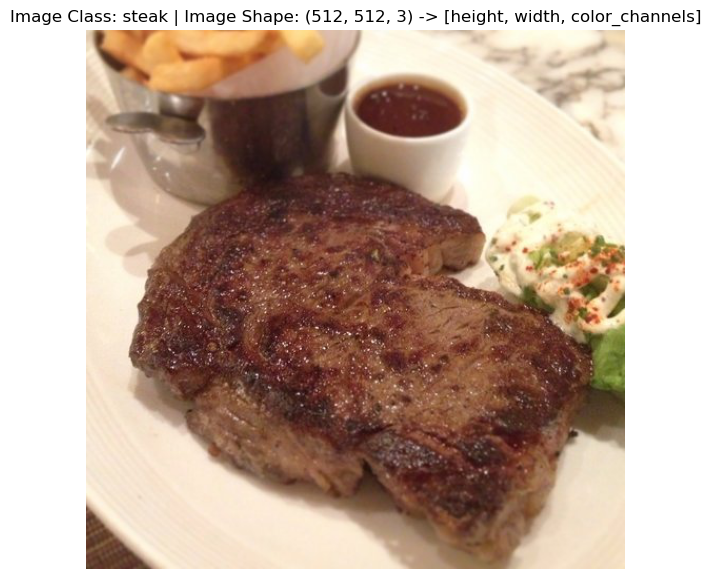

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Turn the imagge into a array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"Image Class: {image_class} | Image Shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);

In [14]:
img_as_array

array([[[232, 216, 191],
        [231, 213, 189],
        [232, 215, 189],
        ...,
        [228, 208, 175],
        [228, 208, 173],
        [228, 208, 173]],

       [[232, 214, 190],
        [229, 211, 187],
        [229, 212, 186],
        ...,
        [229, 209, 174],
        [231, 208, 174],
        [231, 208, 174]],

       [[231, 213, 189],
        [227, 210, 184],
        [228, 208, 183],
        ...,
        [233, 210, 176],
        [233, 211, 174],
        [233, 211, 174]],

       ...,

       [[ 96,  69,  48],
        [101,  74,  53],
        [101,  74,  53],
        ...,
        [247, 227, 194],
        [248, 228, 195],
        [248, 228, 195]],

       [[ 88,  63,  41],
        [ 92,  67,  45],
        [ 94,  67,  46],
        ...,
        [247, 227, 194],
        [247, 227, 192],
        [247, 227, 192]],

       [[ 82,  57,  35],
        [ 84,  59,  37],
        [ 87,  62,  40],
        ...,
        [247, 227, 192],
        [247, 227, 192],
        [246, 226, 191]]

## 3. Transforming data

Before use the img data with PyTorch:
1. Turn the target data into Tensors (in this case, numerical representation of the images).
2. Turn it into a `torch.utils.data.Dataset` and subsequently a `torch.utils.data.DataLoader` -> these will be called `Dataset` & `DataLoader`.

In [16]:
from torch.utils.data import DataLoader
from torchvision import datasets,  transforms

### 3.1 Transforming data with `torchvision.transforms`

Helps get the images ready to be used with model/perform data augmentation
https://pytorch.org/vision/main/transforms.html

In [18]:
# Write a transform for image
data_transform = transforms.Compose([
    # Resize the images to 64x64
    transforms.Resize(size=(64,64)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5),
    # Turn the image into torch.Tensor
    transforms.ToTensor()
])

In [19]:
data_transform(img)

tensor([[[0.8078, 0.5490, 0.8039,  ..., 0.9216, 0.9412, 0.9373],
         [0.8431, 0.5686, 0.8157,  ..., 0.8392, 0.9137, 0.9373],
         [0.9333, 0.6510, 0.6078,  ..., 0.8745, 0.9451, 0.9373],
         ...,
         [0.4118, 0.4275, 0.4196,  ..., 0.9490, 0.9529, 0.9569],
         [0.4118, 0.3882, 0.3882,  ..., 0.9490, 0.9529, 0.9608],
         [0.3843, 0.3725, 0.3725,  ..., 0.9490, 0.9529, 0.9647]],

        [[0.7098, 0.3961, 0.5961,  ..., 0.8431, 0.8588, 0.8471],
         [0.7529, 0.4118, 0.5882,  ..., 0.7608, 0.8314, 0.8471],
         [0.8667, 0.5294, 0.4078,  ..., 0.8039, 0.8784, 0.8667],
         ...,
         [0.2706, 0.2941, 0.2784,  ..., 0.8706, 0.8706, 0.8745],
         [0.2627, 0.2510, 0.2549,  ..., 0.8667, 0.8706, 0.8784],
         [0.2510, 0.2275, 0.2314,  ..., 0.8667, 0.8706, 0.8824]],

        [[0.5961, 0.2667, 0.3765,  ..., 0.7373, 0.7176, 0.7020],
         [0.6471, 0.2902, 0.3608,  ..., 0.6588, 0.7059, 0.7098],
         [0.7608, 0.4157, 0.2431,  ..., 0.7176, 0.7843, 0.

In [20]:
data_transform(img).shape

torch.Size([3, 64, 64])

In [21]:
data_transform(img).dtype

torch.float32

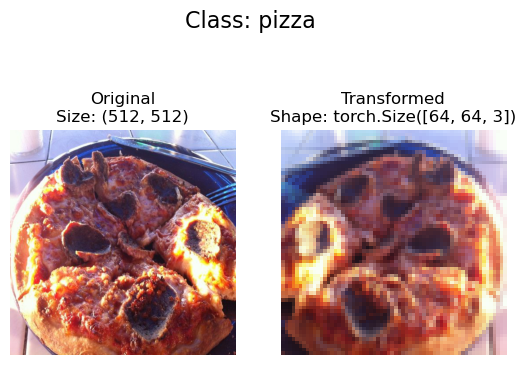

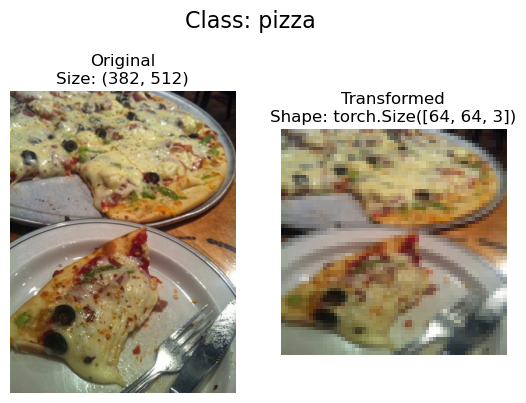

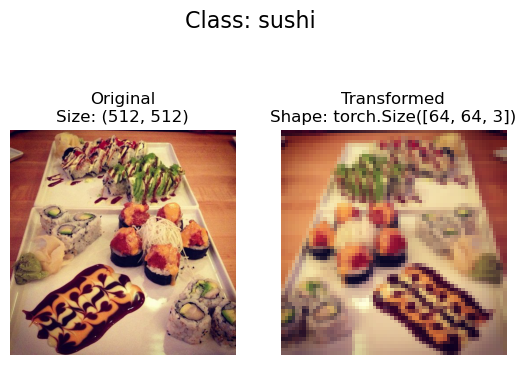

In [22]:
def plot_transformed_img(image_paths: list, transform, n=3, seed=None):
    """
    Selects random images from a path images and load/transform them,
    then, plots the transformed version. 
    """
    if seed:
        random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_paths in random_image_paths:
        with Image.open(image_paths) as f:
            fig, ax = plt.subplots(nrows=1, ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original\nSize: {f.size}")
            ax[0].axis(False)

            # Tranform and plot target image
            transformed_img = transform(f).permute(1,2,0) # it'll need to change shape for matplotlib (C, H, W) -> (H, W, C)
            ax[1].imshow(transformed_img)
            ax[1].set_title(f"Transformed\nShape: {transformed_img.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_paths.parent.stem}", fontsize=16)

plot_transformed_img(image_paths=image_path_list,
                    transform= data_transform,
                    n=3,
                    seed=42)

## 4. Loading image classification data

- Option 1: using `torchvision.datasets.ImageFolder` -> https://pytorch.org/vision/main/generated/torchvision.datasets.ImageFolder.html


In [24]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                 transform=data_transform, # a tranform for the data
                                 target_transform=None) # a transform for the label/target
test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform, 
                                 target_transform=None)
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [25]:
# Get class names as list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [26]:
# Get class names as dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [27]:
# Check the lengths of our dataset
len(train_data), len(test_data)

(225, 75)

In [28]:
train_data.samples[0]

('data/pizza_steak_sushi/train/pizza/1008844.jpg', 0)

In [29]:
# Index on the train_data Dataset to get a single image and sample
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n {img}")
print(f"\nImage shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"image label: {class_names[label]}")
print(f"Label datatype: {type(label)}")

Image tensor:
 tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0706, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0196, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.0

Original shape: torch.Size([3, 64, 64]) -> [color_chanels, height, width]
Image permute: torch.Size([64, 64, 3]) -> [height, width, color_chanel]


Text(0.5, 1.0, 'pizza')

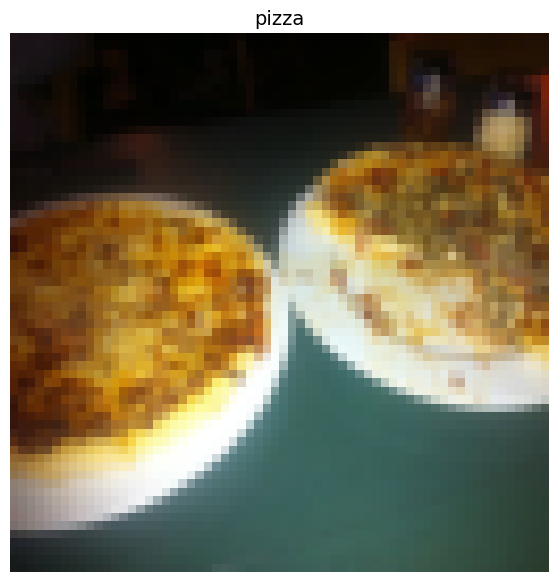

In [30]:
# Rearrenge the order dimensions
img_permuted = img.permute(1,2,0)

# Print out different shapes
print(f"Original shape: {img.shape} -> [color_chanels, height, width]")
print(f"Image permute: {img_permuted.shape} -> [height, width, color_chanel]")

# Plot the image
plt.figure(figsize=(10,7))
plt.imshow(img_permuted)
plt.axis("off")
plt.title(class_names[label], fontsize=14)

### 4.4 Turn loaded images into `Dataloader`'s

A `Dataloader` help the ML engineer to turn the `Dataset` into iterables and turn possible to customize the `batch_size` so the model can see `batch_size` images at a time.

In [32]:
import os
# Turn train and test datasets into Dataloader's
from torch.utils.data import DataLoader
BACTH_SIZE = 1
train_dataloader = DataLoader(
    dataset=train_data,
    batch_size=BACTH_SIZE,
    num_workers=2,
    shuffle=True
)
test_dataloader = DataLoader(    
    dataset=test_data,
    batch_size=BACTH_SIZE,
    num_workers=2,
    shuffle=False
)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7a31c4450190>,
 <torch.utils.data.dataloader.DataLoader at 0x7a31c8b8a110>)

In [33]:
len(train_dataloader), len(test_dataloader)

(225, 75)

In [34]:
img, label = next(iter(train_dataloader))

# Batch size'll now be 1, but is possible to change
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


## 5. Loading image data with a Custom `Datasets`

1. Load teh images from file.
2. Get class names from the Dataset.
3. Get classes as dictionary from teh Dataset.

Pros and Cons of creating a own Dataset

*Pros*:
- Can create a `Dataset` out of almost anything.
- Not limited to PyTorch pre-built `Dataset` functions.

*Cons*:
- Even though you could create `Dataset` out of almost anything, it doesn't mean it'll work . . .
- Using a custom `Dataset` often results in more code writing, which could be prone to errors or performance issues.


In [36]:
from typing import Tuple, List, Dict

In [37]:
# Instance of torchvision.datasets.ImageFolder()
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.1 Creating a helper function to get class names

To do:
1. Get the class names using `os.scandir()` to traverse a target directory - ideally the directory is in standard image classification format.
2. Raise an error if the class names aren't found - if this happens, there might be something wrong with the directory structure.
3. Turn the class names into a dict and a list and return them.

In [39]:
# Setup path directory
target_directory = train_dir
print(f"Target dir: {target_directory}")

# Get the class names from the target director
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

Target dir: data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [40]:
list(os.scandir(target_directory))

[<DirEntry 'pizza'>, <DirEntry 'sushi'>, <DirEntry 'steak'>]

In [41]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
    """
    Finds the class folder names in a target directory
    """
    # Get the class names by scanning the target directory
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
    
    # Raise an error if class names could not be found
    if not classes:
        raise FileNotFoundError(f"Couldn't find any classes in {directory}. . .Please check your directory")
    
    # Create a dictionary of index labels (computers prefer numbers rather than strings as labels)
    class_to_idx = {class_name: i for i, class_name in enumerate(classes)}
    return classes, class_to_idx

In [42]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.2 Create a custom `Dataset` to replicate `ImageFolder`

To create your own Custom Dataset:
1. Subclass `torch.utils.data.Dataset`
2. Init the subclass with a target directory as well as a transform if necessary.
3. Create several attribute:
- paths: paths of our images
- transform: the necessary transform
- classes: a list of the target classes
- class_to_idx: a dict of the target classes mapped to integer labels

4. Create a function to `load_images()`, this function will open an image
5. Overwrite the `__len()__` method to return the length of our dataset
6. Overwrite the `__getitem()__` method to return a given sample whrn passed an index

In [44]:
# 0. Write a custom dataset class
from torch.utils.data import Dataset
import pathlib
# 1. Subsclassing
class ImageFolderCustom(Dataset):
    # 2. Initialize the custom dataset
    def __init__(self, targ_dir: str, transform=None):
        # 3. Create class attributes
        
        # get all the img paths
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
        # Setup transforms
        self.transform = transform
        # Create classes and class_to_idx attributes
        self.classes, self.class_to_idx = find_classes(targ_dir)

    # 4. Create a function to load image
    def laod_image(self, index: int) -> Image.Image:
        image_path = self.paths[index]
        return Image.open(image_path)
    # 5. Overwrite __len__()
    def __len__(self) -> int:
        "Returns the total number of samples."
        return len(self.paths)

    # 6. Overwrite __getitem__() method to return a particular sample
    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        "Returns one sample of data, data and label (X, y)."
        img = self.laod_image(index)
        class_name = self.paths[index].parent.name # expects path in format: data_folder/class_name/image.jpg
        class_idx = self.class_to_idx[class_name] 

        # Transform if necessary
        if self.transform:
            return self.transform(img), class_idx # return data, label (X, y)
        else:
            return img, class_idx # return untransformed image and label

In [45]:
# Create a transform (img -> tensors)
from torchvision import transforms
train_transforms = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])
test_transforms = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [46]:
# Test out how ImageFolderCustom works
train_data_custom = ImageFolderCustom(targ_dir=train_dir,
                                     transform=train_transforms)
test_data_custom = ImageFolderCustom(targ_dir=test_dir,
                                    transform=test_transforms)
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7a31c44ace90>,
 <__main__.ImageFolderCustom at 0x7a31c4463150>)

In [47]:
len(train_data), len(train_data_custom)

(225, 225)

In [48]:
len(test_data), len(test_data_custom)

(75, 75)

In [49]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [50]:
# Check for equality between ImageFolder Dataset & ImageFolderCustomDataset
print(train_data_custom.classes==train_data.classes)
print(test_data_custom.classes==test_data.classes)

True
True


### 5.3 Visualizing random images
1. Take in a `Dataset` and a number of other parameters such as class names and how many images to visualize.
2. To prevent the display getting out of hand, it's necessary cap the number of images to see at 10.
3. Set the random seed for reproducibility.
4. Get a list of random sample indexes from teh target dataset.
5. Setup a matplotlib plot.
6. Loop through the random sample images and plot them with matplotlib.
7. Make sure the dimensions of the images line up with matplotlib (HWC)

In [52]:
# 1. Creating a function to take in a Dataset
def display_random_img(dataset: torch.utils.data.Dataset,
                      classes: List[str] = None,
                      n: int = 10,
                      display_shape: bool = True,
                      seed: int = None):
    # 2. Adjust if n is too high
    if n > 10:
        n=10
        display_shape = False
        print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")

    # 3. Set the seed
    if seed:
        random.seed(seed)

    # 4. Get random sample indexes
    random_samples_idx = random.sample(range(len(dataset)), k=n)
    # 5. Setup the plot
    plt.figure(figsize=(16,8))
    
    #  6. Loop through random indexes and plot them with matplotlib
    for i, targ_sample in enumerate(random_samples_idx):
        targ_img, targ_label, = dataset[targ_sample][0], dataset[targ_sample][1]

    # 7. Adjust tensor dimensions for plotting
    targ_img_adjust = targ_img.permute(1,2,0) #(CHW) -> (HWC)
    # Plot adjusted samples
    plt.subplot(1, n, i+1)
    plt.imshow(targ_img_adjust)
    plt.axis("off")
    if classes:
        title = f"Class: {classes[targ_label]}"
        if display_shape:
            title = title + f"\nshape: {targ_img_adjust.shape}"
    plt.title(title)

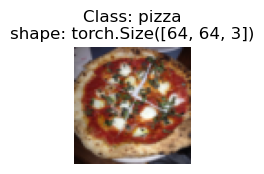

In [53]:
# Display random images from the ImageFolder created Dataset
display_random_img(train_data, n=9, classes=class_names, seed=None)

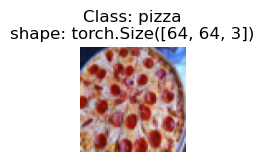

In [54]:
# Display random images from the ImageFolderCustom Dataset
display_random_img(train_data_custom, n=10, classes=class_names, seed=None)

### 5.4 Turns custom loaded images into Dataloader's

In [56]:
BATCH_SIZE = 32
train_dataloader_custom = DataLoader(dataset=train_data_custom,
                                    batch_size=BATCH_SIZE,
                                    num_workers = os.cpu_count(),
                                    shuffle=True)
test_dataloader_custom = DataLoader(dataset=test_data_custom,
                                    batch_size=BATCH_SIZE,
                                    num_workers = os.cpu_count(),
                                    shuffle=False)
train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7a31c45c5090>,
 <torch.utils.data.dataloader.DataLoader at 0x7a31c44dea10>)

In [57]:
# Get a sigle sample from Custom Dataloader (img & label)
img_custom, label_custom = next(iter(train_dataloader_custom)) # An iterator is an object that allows to traverse through a sequence (like a list or, in this case, batches of data) one item at a time.
img_custom.shape, label_custom.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

## 6. Other forms of transforms (data augmentation)

`Data augmentation`: Techniques used to increase the amount of data by adding slightly modified copies of already existing data or newly created synthect data from existing data. In other words, is the process of artificially adding diversity to the training data.
- widely used in machine learning to reduce overfitting when training machine learning models, achieved by training models on several slightly-modified copies of existing data.

In the case of the image data, this may mean applying various image transformations to the training images. This practice hopefully results in a model that's more generalizable to unseen data.

https://pytorch.org/blog/how-to-train-state-of-the-art-models-using-torchvision-latest-primitives/

In [59]:
# Lets look to the trivialaugment -> https://pytorch.org/vision/main/generated/torchvision.transforms.TrivialAugmentWide.html
from torchvision import transforms

train_transform = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])
test_transform = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.ToTensor()
])

In [60]:
# Get all image paths
img_path_list = list(image_path.glob("*/*/*.jpg"))
img_path_list[:10]

[PosixPath('data/pizza_steak_sushi/train/pizza/702165.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2026009.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/68684.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2428085.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/3530210.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/12301.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/244505.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/3269634.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/741883.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/300869.jpg')]

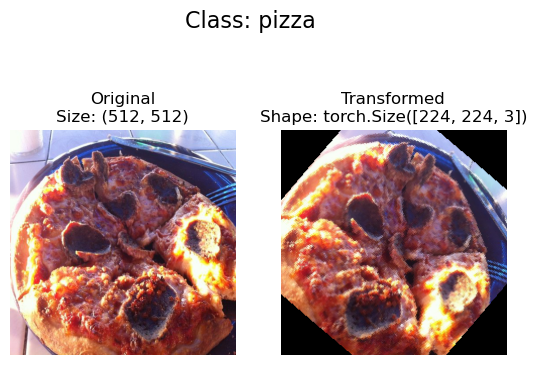

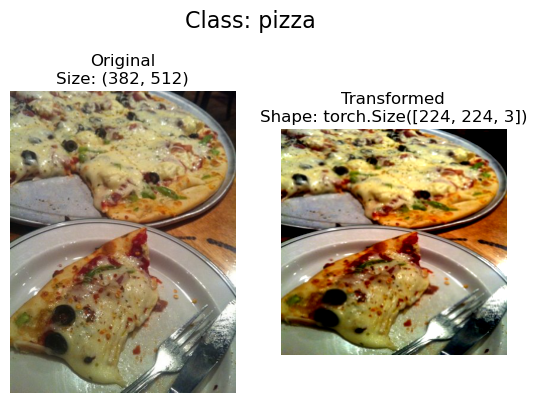

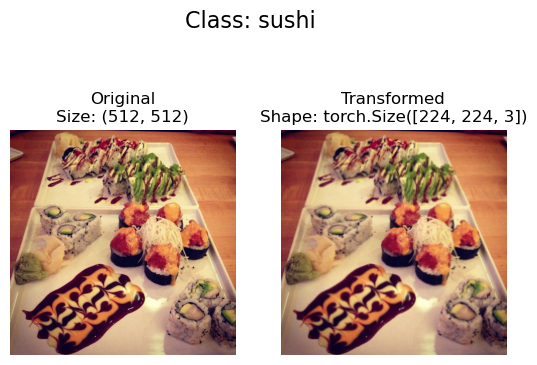

In [61]:
# Plot random images transformed images
plot_transformed_img(
    image_paths=image_path_list,
    transform=train_transform,
    n=3,
    seed=42
)

## 7. Model 0: TinyVGG without data augmentation

Replicating TinyVGG architecture from the CNN explainer site below:

https://poloclub.github.io/cnn-explainer/

### 7.1 Creating transforms and loading data for Model 0

In [64]:
# Creating a transform
simple_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [65]:
# 1. Load & transform data
train_data_simple = datasets.ImageFolder(root=train_dir,
                                        transform=simple_transform)
test_data_simple = datasets.ImageFolder(root=test_dir,
                                       transform=simple_transform)
# 2. Turn the datasets into DataLoaders

# setup batch size & number of works
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

# Create DataLoader's
train_dataloader_simple = DataLoader(dataset=train_data_simple,
                                    batch_size=BATCH_SIZE,
                                    num_workers=NUM_WORKERS,
                                    shuffle=True)
test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    num_workers=NUM_WORKERS,
                                    shuffle=False)


### 7.2 Creating TinyVGG model class

In [67]:
class TinyVGG(nn.Module):
    def __init__(self, input_shape: int,
                hidden_units: int,
                output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=0),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                        stride=2) # default stride value is same as kernel_size
        ) 
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=0),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                        stride=2)            
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*13*13,
                     out_features=output_shape)
        )
    def forward(self, x):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)
        return x
        """
        The method used above in forward() makes the function reassigning 'x' every time that 
        computation through the layers are made. In other words, there is a little time spent
        when the computation (which occurs in GPU) back to the 'x' variable (which is in CPU memory).
        
        An alternative method which save time it is leave the whole forward process in the GPU,
        look:
        
        return self.classifier(self.conv_block_1(self.conv_block_2(x))) 
        
        The method above benefits for operators fusion - speeds up how the GPU performs computations.
        More info in the link below:
        https://horace.io/brrr_intro.html
        """
        

In [68]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [69]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, # number of color channels in the image data
                 hidden_units=10,
                 output_shape=len(class_names)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

### 7.3 Try a forward pass on a single image to test the model

In [71]:
# get a single image batch
image_batch, label_batch = next(iter(train_dataloader_simple))
image_batch.shape, label_batch.shape 

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [72]:
# Try a forward pass
model_0(image_batch.to(device))

tensor([[ 2.0789e-02, -1.9351e-03,  9.5318e-03],
        [ 1.8427e-02,  2.4670e-03,  6.6757e-03],
        [ 1.7699e-02,  1.0262e-03,  9.4657e-03],
        [ 2.4441e-02, -3.3526e-03,  9.6011e-03],
        [ 1.9930e-02,  6.6316e-04,  1.0779e-02],
        [ 2.1281e-02,  2.0434e-03,  5.0046e-03],
        [ 2.0999e-02,  1.2868e-04,  1.2473e-02],
        [ 2.1577e-02, -1.9507e-03,  9.6941e-03],
        [ 2.4504e-02, -4.7745e-03,  8.5280e-03],
        [ 2.0252e-02, -4.7293e-04,  1.0908e-02],
        [ 2.2215e-02, -4.1837e-04,  9.8123e-03],
        [ 2.2313e-02, -2.1622e-03,  9.4455e-03],
        [ 2.1841e-02, -3.7132e-03,  8.3783e-03],
        [ 2.2863e-02, -1.7724e-03,  1.0287e-02],
        [ 2.1647e-02, -4.4139e-03,  9.5021e-03],
        [ 2.2096e-02, -4.1426e-03,  9.3853e-03],
        [ 2.1209e-02, -4.4219e-03,  1.1475e-02],
        [ 2.1711e-02, -2.7656e-03,  8.5006e-03],
        [ 1.9951e-02,  2.8272e-05,  8.4380e-03],
        [ 1.8298e-02,  1.6306e-03,  8.5499e-03],
        [ 2.0768e-02

### 7.4 Checking the shapes through the model

`torchinfo`: https://github.com/TylerYep/torchinfo

In [74]:
from torchinfo import summary
summary(model_0, input_size=[1,3,64,64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

### 7.5 Create train & test loops functions

In [76]:
def train_loop(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              optimizer: torch.optim.Optimizer,
              device=device):

    train_loss, train_acc = 0, 0

    # Put model into training mode
    model.train()

    # Loop through data loaders batches
    for batch, (X, y) in enumerate(dataloader):
        # Put data on target device (GPU)
        X, y = X.to(device), y.to(device)
        
        # Forward pass -> outputs the raw logits from the model 
        y_pred = model(X)
        
        # Calculate loss and accuracy (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() # accumulate train loss

        # Gradient descent
        optimizer.zero_grad()
        
        # Backpropagation
        loss.backward()
        
        # Optimizer setp
        optimizer.step()

        # Accuracy
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class==y).sum()/len(y_pred)

        # Adjust metrics to get average loss and accuracy per batch
        train_loss = train_loss / len(dataloader)
        train_acc = train_acc / len(dataloader)
        return train_loss, train_acc

In [77]:
def test_loop(model: torch.nn.Module,
           dataloader: torch.utils.data.DataLoader,
           loss_fn: torch.nn.Module,
           device: torch.device = device):
    """Perform testing step with model going over dataloader"""
    test_loss, test_acc = 0, 0

    # Put the model in eval mode
    model_0.eval()
    
    # Turn on inference mode context manager
    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)
            # 1. Forward pass (outputs raw logits)
            test_pred = model(X)
            # 2. Calculate loss/accuracy (accumulatively)
            loss = loss_fn(test_pred, y)
            test_loss += loss.item()
            # Accuracy
            test_preds_labels = test_pred.argmax(dim=1)
            test_acc += ((test_preds_labels==y).sum().item()/len(test_preds_labels))
            
    # Calculate the test loss/acc average per batch
    test_loss /= len(dataloader)
    test_acc /= len(dataloader)
    
    return test_loss, test_acc

In [78]:
def train(model: torch.nn.Module,
         train_dataloader: torch.utils.data.DataLoader,
         test_dataloader: torch.utils.data.DataLoader,
         optimizer: torch.optim.Optimizer,
         loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
         epochs: int = 5,
         device = device):
    # Create an empty result dictionary
    results = {"train_loss":[],
              "train_acc":[],
              "test_loss":[],
              "test_acc":[]}
    # Loop through training and testing steps for a number of epochs
    for epoch in range(epochs):
        train_loss, train_acc = train_loop(model=model,
                                          dataloader=train_dataloader,
                                          loss_fn=loss_fn,
                                          optimizer=optimizer,
                                          device=device)
        test_loss, test_acc = test_loop(model=model,
                                          dataloader=test_dataloader,
                                          loss_fn=loss_fn,
                                          device=device)
        print(f"Epoch: {epoch+1}\n- - - - - - \nTrain loss: {train_loss:.4f} | Train acc: {train_acc:.4f} | Test_loss: {test_loss:.4f} | Test_acc: {test_acc:.4f}\n")
        # Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # Return the filled results at the end of the epochs
    return results

## 7.7 Train & evaluate model 0

In [80]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHS = 50
# Model instance
model_0 = TinyVGG(input_shape=3,
                 hidden_units=10,
                 output_shape=len(train_data.classes)).to(device)
# Setup Loss function & Optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                            lr=0.001)
# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_0,
                       train_dataloader=train_dataloader_simple,
                       test_dataloader=test_dataloader_simple,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=NUM_EPOCHS)
# End the timer & print out how long the training took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

Epoch: 1
- - - - - - 
Train loss: 0.1370 | Train acc: 0.0586 | Test_loss: 1.1103 | Test_acc: 0.2604

Epoch: 2
- - - - - - 
Train loss: 0.1366 | Train acc: 0.0469 | Test_loss: 1.1360 | Test_acc: 0.2604

Epoch: 3
- - - - - - 
Train loss: 0.1389 | Train acc: 0.0391 | Test_loss: 1.1421 | Test_acc: 0.2604

Epoch: 4
- - - - - - 
Train loss: 0.1346 | Train acc: 0.0508 | Test_loss: 1.1564 | Test_acc: 0.2604

Epoch: 5
- - - - - - 
Train loss: 0.1399 | Train acc: 0.0312 | Test_loss: 1.1608 | Test_acc: 0.2604

Epoch: 6
- - - - - - 
Train loss: 0.1401 | Train acc: 0.0430 | Test_loss: 1.1523 | Test_acc: 0.2604

Epoch: 7
- - - - - - 
Train loss: 0.1383 | Train acc: 0.0352 | Test_loss: 1.1425 | Test_acc: 0.2812

Epoch: 8
- - - - - - 
Train loss: 0.1391 | Train acc: 0.0586 | Test_loss: 1.1296 | Test_acc: 0.1979

Epoch: 9
- - - - - - 
Train loss: 0.1365 | Train acc: 0.0586 | Test_loss: 1.1210 | Test_acc: 0.1979

Epoch: 10
- - - - - - 
Train loss: 0.1374 | Train acc: 0.0430 | Test_loss: 1.1131 | Test_ac

### 7.8 Plot the loss curves of Model 0

Show the loss progress through the time

In [82]:
# Get the model_0_results keys
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [83]:
def plot_loss_curves(results: Dict[str, List[float]]):
    """Plots training curves of a result dictionary"""
    
    # Get the loss & acc values, converting tensors to NumPy
    loss = [x.cpu().numpy() if isinstance(x, torch.Tensor) else x for x in results["train_loss"]]
    test_loss = [x.cpu().numpy() if isinstance(x, torch.Tensor) else x for x in results["test_loss"]]
    acc = [x.cpu().numpy() if isinstance(x, torch.Tensor) else x for x in results["train_acc"]]
    test_acc = [x.cpu().numpy() if isinstance(x, torch.Tensor) else x for x in results["test_acc"]]

    # Counting the epochs there were
    epochs = range(len(results["train_loss"]))
    # Setup plot
    plt.figure(figsize=(15,7))
    # Ploting loss
    plt.subplot(1,2,1)
    plt.plot(epochs, loss, label="train_loss")
    plt.plot(epochs, test_loss, label="test_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()
    # Plot acc
    plt.subplot(1,2,2)
    plt.plot(epochs, acc, label="train_acc")
    plt.plot(epochs, test_acc, label="test_acc")
    plt.title("Acc")
    plt.xlabel("Epochs")
    plt.legend();

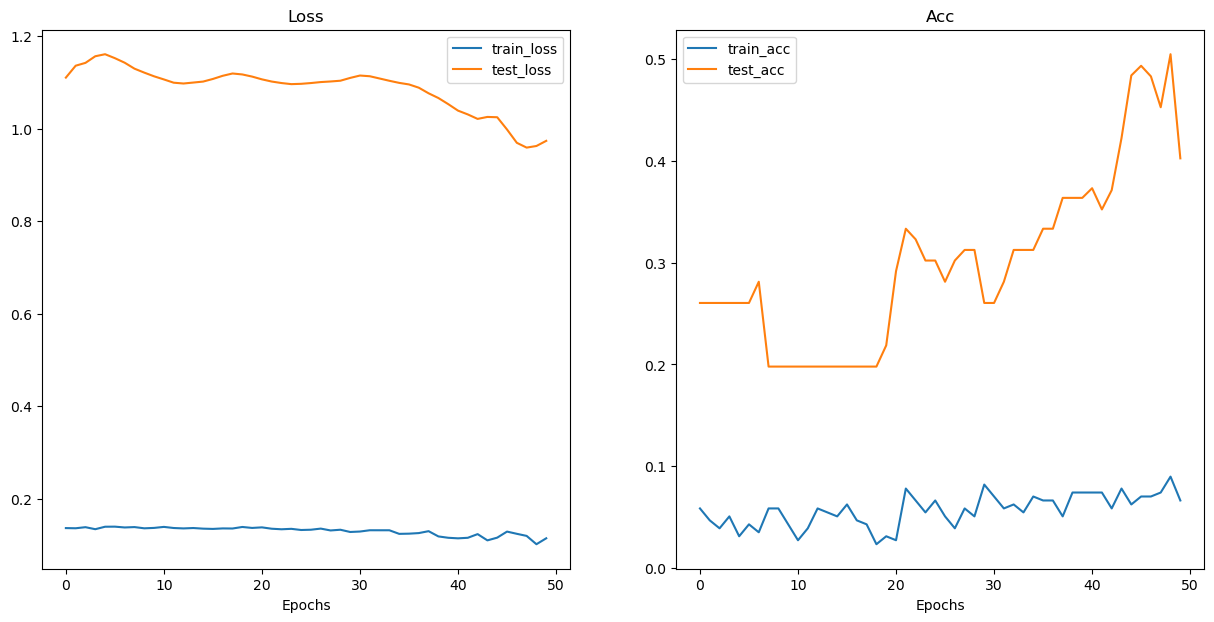

In [84]:
plot_loss_curves(model_0_results)

## 8. Ideal loss curve

Loss curve is one of the most helpful ways to troubleshoot a model. The expected it is that Loss Curve has a descending character, but even in this behavior exists some especific cases to pay atention. 

- `Underfitting`: The loss could be lower.
- `Overfitting`: Train lower than test.
- `Just Right`: Train and test loss similar.

## 9. Model 1: TinyVGG with Data Augmentation

### 9.1 Create transform with data augmentation

In [87]:
# Create training transform with TrivialAugment
train_transform_trivial = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])
test_transform_trivial = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
    
    # Don't apply Augmentation in the test dataset because it is only necessary to evaluate
    # the model in the test dataset. The model won't learn any pattern here, just evaluate
    # params.
    
])


### 9.2 Create train and test Dataset's and DataLoader's with data augmentation

In [89]:
# Turn image folder into Datasets
train_data_augmentation = datasets.ImageFolder(root=train_dir,
                                               transform=train_transform_trivial)
test_data_augmentation = datasets.ImageFolder(root=test_dir,
                                               transform=test_transform_trivial)
# Dataset -> DataLoader
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
torch.manual_seed(42)

train_dataloader_augumented = DataLoader(dataset=train_data_augmentation,
                                      batch_size=BATCH_SIZE,
                                      num_workers=NUM_WORKERS,
                                      shuffle=True)
test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                      batch_size=BATCH_SIZE,
                                      num_workers=NUM_WORKERS,
                                      shuffle=False)

### 9.3 Construct and train a new Model

In [91]:
# Create new model and send it to the GPU
torch.manual_seed(42)
model_1 = TinyVGG(input_shape=3,
                 hidden_units=10,
                 output_shape=len(train_data_augmentation.classes)).to(device)
model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [92]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Setting hyperparameters
NUM_EPOCHS = 50
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(),
                             lr=0.001)
# Count the inital time
start_time = timer()
# Train the model
model_1_results = train(model=model_1,
                       train_dataloader=train_dataloader_augumented,
                       test_dataloader=test_dataloader_simple,
                       loss_fn=loss_fn,
                        optimizer=optimizer,
                       epochs=NUM_EPOCHS,
                       device=device)
# Count the end time & print how long time the model took the be trained
end_time = timer()
print(f"Total training time: {end_time-start_time} seconds")

Epoch: 1
- - - - - - 
Train loss: 0.1372 | Train acc: 0.0312 | Test_loss: 1.0707 | Test_acc: 0.5417

Epoch: 2
- - - - - - 
Train loss: 0.1359 | Train acc: 0.0508 | Test_loss: 1.0517 | Test_acc: 0.5417

Epoch: 3
- - - - - - 
Train loss: 0.1374 | Train acc: 0.0391 | Test_loss: 1.0440 | Test_acc: 0.5417

Epoch: 4
- - - - - - 
Train loss: 0.1422 | Train acc: 0.0312 | Test_loss: 1.0495 | Test_acc: 0.5417

Epoch: 5
- - - - - - 
Train loss: 0.1367 | Train acc: 0.0430 | Test_loss: 1.0562 | Test_acc: 0.5417

Epoch: 6
- - - - - - 
Train loss: 0.1435 | Train acc: 0.0273 | Test_loss: 1.0665 | Test_acc: 0.5417

Epoch: 7
- - - - - - 
Train loss: 0.1406 | Train acc: 0.0352 | Test_loss: 1.0771 | Test_acc: 0.2604

Epoch: 8
- - - - - - 
Train loss: 0.1387 | Train acc: 0.0391 | Test_loss: 1.0872 | Test_acc: 0.2604

Epoch: 9
- - - - - - 
Train loss: 0.1382 | Train acc: 0.0469 | Test_loss: 1.0987 | Test_acc: 0.2604

Epoch: 10
- - - - - - 
Train loss: 0.1360 | Train acc: 0.0508 | Test_loss: 1.1081 | Test_ac

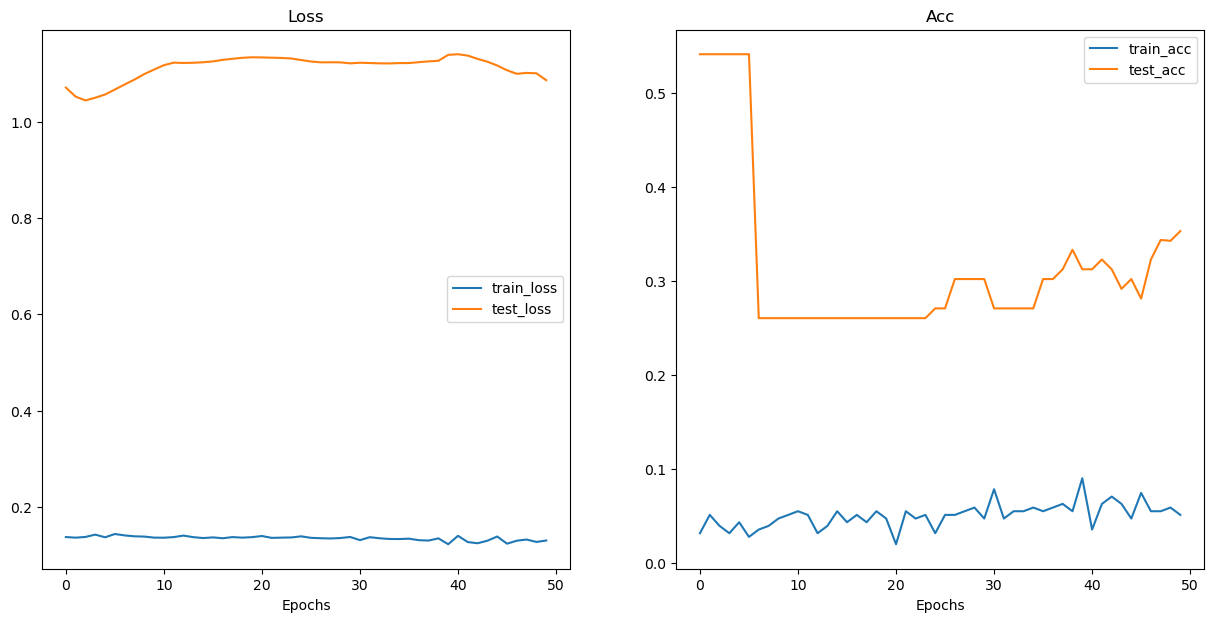

In [93]:
plot_loss_curves(model_1_results)

## 10 Compare model results

Ways:
1. Hard coding
2. PyTorch + Tensorboard: https://pytorch.org/tutorials/recipes/recipes/tensorboard_with_pytorch.html
3. Weights & Biases: https://wandb.ai/site/experiment-tracking/
4. MLFlow: https://mlflow.org/

In [111]:
import pandas as pd

# Convert CUDA tensors(GPU) to NumPy (CPU) scalars in the dictionary
model_0_results_cpu = {
    key: [x.cpu().detach().numpy().item() if isinstance(x, torch.Tensor) else x for x in values]
    for key, values in model_0_results.items()
}
model_1_results_cpu = {
    key: [x.cpu().detach().numpy().item() if isinstance(x, torch.Tensor) else x for x in values]
    for key, values in model_1_results.items()
}

# DataFrames
model_0_df = pd.DataFrame(model_0_results_cpu)
model_1_df = pd.DataFrame(model_1_results_cpu)

model_0_df.head()

,train_loss,train_acc,test_loss,test_acc
0,0.136978,0.058594,1.110262,0.260417
1,0.136598,0.046875,1.135984,0.260417
2,0.138925,0.039062,1.142130,0.260417
3,0.134563,0.050781,1.156402,0.260417
4,0.139915,0.031250,1.160799,0.260417


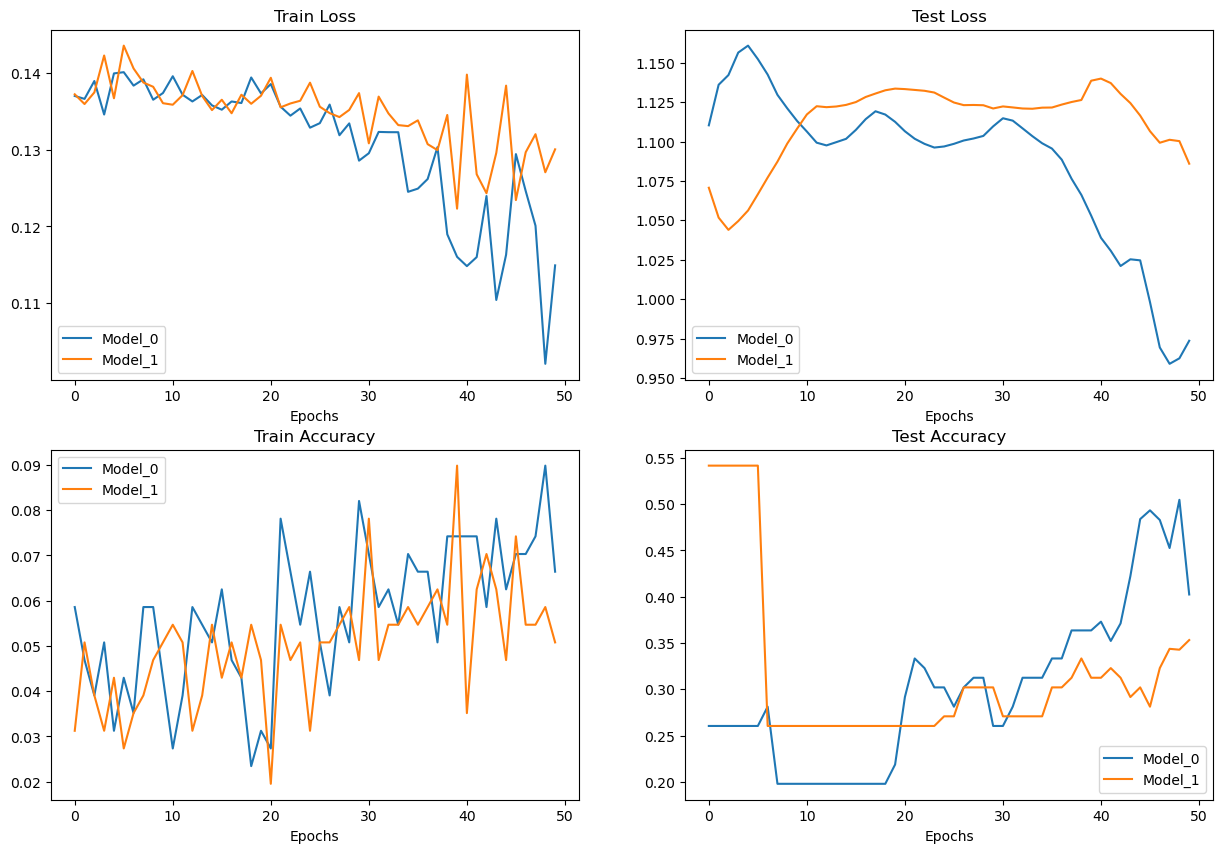

In [133]:
# Setup a plot
plt.figure(figsize=(15,10))

# Get the number of epochs
epochs = range(len(model_0_df))

# Plot train loss
plt.subplot(2,2,1) # (n_rows, n_cols, n_index)
plt.plot(epochs, model_0_df["train_loss"], label="Model_0")
plt.plot(epochs, model_1_df["train_loss"], label="Model_1")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot test loss
plt.subplot(2,2,2)
plt.plot(epochs, model_0_df["test_loss"], label="Model_0")
plt.plot(epochs, model_1_df["test_loss"], label="Model_1")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot train acc
plt.subplot(2,2,3)
plt.plot(epochs, model_0_df["train_acc"], label="Model_0")
plt.plot(epochs, model_1_df["train_acc"], label="Model_1")
plt.title("Train Accuracy")
plt.xlabel("Epochs")
plt.legend()

# Plot test acc
plt.subplot(2,2,4)
plt.plot(epochs, model_0_df["test_acc"], label="Model_0")
plt.plot(epochs, model_1_df["test_acc"], label="Model_1")
plt.title("Test Accuracy")
plt.xlabel("Epochs")
plt.legend()

## 11. Making prediction with a custom image


In [158]:
# Downloading the image
import requests
custom_img_path = data_path / "04-pizza-dad.jpeg"
if not custom_img_path.is_file():
    with open(custom_img_path, "wb") as f:
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
        print(f"Downloading {custom_img_path}...")
        f.write(request.content)
else:
    print(f"{custom_img_path} already exists, skipping download.")

### 11.1 Loading in a custsom image with PyTorch
To make predictions from a custom image is necessary to certificate that this data is in the same format as the data of the trained model. 

 - In tensor form with datatype `torch.float32`
 - Of shape 64x64x3
 - On the right device

To read an image into PyTorch:

https://pytorch.org/vision/0.19/generated/torchvision.io.read_image.html

In [169]:
custom_img_uint8 = torchvision.io.read_image(custom_img_path)
print(f"Custom img tensor:\n{custom_img_uint8}")
print(f"\nCustom img shape:\n{custom_img_uint8.shape}")
print(f"\nCustom img dtype:\n{custom_img_uint8.dtype}")

Custom img tensor:
tensor([[[154, 173, 181,  ...,  21,  18,  14],
         [146, 165, 181,  ...,  21,  18,  15],
         [124, 146, 172,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 190, 193,  ...,  22,  19,  15],
         [163, 182, 193,  ...,  22,  19,  16],
         [141, 163, 184,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 107, 104, 103],
         [ 47,  38,  24,  ..., 108, 104, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[119, 138, 147,  ...,  17,  14,  10],
         [111, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  52,  52,  48],
         [ 27,  18,   4,  ...,  50,  49,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)

Custom img shape:
torch.Size([3, 4032, 3024])

Custom img dtype:
to

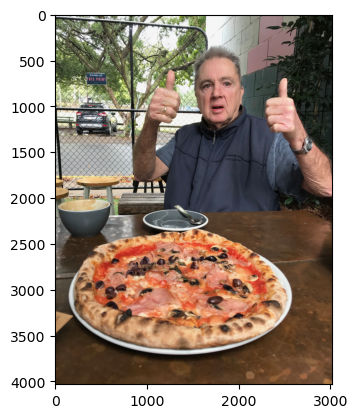

In [163]:
plt.imshow(custom_img_uint8.permute(1,2,0))

### 11.2 Making a prediction on a custom image with a trained PyTorch model

In [184]:
img

tensor([[[[0.9373, 0.9412, 0.9216,  ..., 0.8039, 0.5490, 0.8078],
          [0.9373, 0.9137, 0.8392,  ..., 0.8157, 0.5686, 0.8431],
          [0.9373, 0.9451, 0.8745,  ..., 0.6078, 0.6510, 0.9333],
          ...,
          [0.9569, 0.9529, 0.9490,  ..., 0.4196, 0.4275, 0.4118],
          [0.9608, 0.9529, 0.9490,  ..., 0.3882, 0.3882, 0.4118],
          [0.9647, 0.9529, 0.9490,  ..., 0.3725, 0.3725, 0.3843]],

         [[0.8471, 0.8588, 0.8431,  ..., 0.5961, 0.3961, 0.7098],
          [0.8471, 0.8314, 0.7608,  ..., 0.5882, 0.4118, 0.7529],
          [0.8667, 0.8784, 0.8039,  ..., 0.4078, 0.5294, 0.8667],
          ...,
          [0.8745, 0.8706, 0.8706,  ..., 0.2784, 0.2941, 0.2706],
          [0.8784, 0.8706, 0.8667,  ..., 0.2549, 0.2510, 0.2627],
          [0.8824, 0.8706, 0.8667,  ..., 0.2314, 0.2275, 0.2510]],

         [[0.7020, 0.7176, 0.7373,  ..., 0.3765, 0.2667, 0.5961],
          [0.7098, 0.7059, 0.6588,  ..., 0.3608, 0.2902, 0.6471],
          [0.7608, 0.7843, 0.7176,  ..., 0

In [188]:
# Load in the custom image and convert to torch.float32
custom_img = torchvision.io.read_image(custom_img_path).type(torch.float32) / 255.
custom_img, custom_img.shape

(tensor([[[0.6039, 0.6784, 0.7098,  ..., 0.0824, 0.0706, 0.0549],
          [0.5725, 0.6471, 0.7098,  ..., 0.0824, 0.0706, 0.0588],
          [0.4863, 0.5725, 0.6745,  ..., 0.0706, 0.0667, 0.0588],
          ...,
          [0.2824, 0.2314, 0.1765,  ..., 0.5961, 0.5882, 0.5804],
          [0.2510, 0.2157, 0.1608,  ..., 0.5882, 0.5765, 0.5647],
          [0.2510, 0.2353, 0.1804,  ..., 0.5843, 0.5725, 0.5608]],
 
         [[0.6706, 0.7451, 0.7569,  ..., 0.0863, 0.0745, 0.0588],
          [0.6392, 0.7137, 0.7569,  ..., 0.0863, 0.0745, 0.0627],
          [0.5529, 0.6392, 0.7216,  ..., 0.0745, 0.0706, 0.0627],
          ...,
          [0.2157, 0.1647, 0.1098,  ..., 0.4196, 0.4078, 0.4039],
          [0.1843, 0.1490, 0.0941,  ..., 0.4235, 0.4078, 0.4000],
          [0.1843, 0.1686, 0.1137,  ..., 0.4196, 0.4078, 0.3961]],
 
         [[0.4667, 0.5412, 0.5765,  ..., 0.0667, 0.0549, 0.0392],
          [0.4353, 0.5098, 0.5686,  ..., 0.0667, 0.0549, 0.0431],
          [0.3412, 0.4353, 0.5333,  ...,

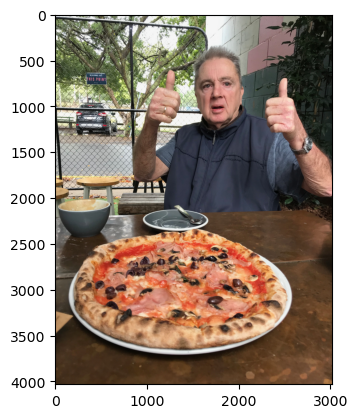

In [190]:
plt.imshow(custom_img.permute(1,2,0))

In [194]:
# Resizing the image
custom_img_transform = transforms.Compose([
    transforms.Resize(size=(64,64))
])
custom_img_transform(custom_img), custom_img_transform(custom_img).shape

(tensor([[[0.4673, 0.5292, 0.5601,  ..., 0.0976, 0.0604, 0.0578],
          [0.4014, 0.4351, 0.4291,  ..., 0.0671, 0.0714, 0.0848],
          [0.5172, 0.4849, 0.4472,  ..., 0.0613, 0.0605, 0.0694],
          ...,
          [0.2999, 0.2819, 0.2705,  ..., 0.4570, 0.4019, 0.3955],
          [0.2767, 0.2697, 0.2606,  ..., 0.4620, 0.4208, 0.3763],
          [0.2502, 0.2557, 0.2690,  ..., 0.4894, 0.6088, 0.5344]],
 
         [[0.4926, 0.5517, 0.5773,  ..., 0.1246, 0.0688, 0.0680],
          [0.4545, 0.4876, 0.4600,  ..., 0.0806, 0.0824, 0.1022],
          [0.5485, 0.5217, 0.4785,  ..., 0.0689, 0.0704, 0.0882],
          ...,
          [0.2066, 0.1971, 0.1882,  ..., 0.3125, 0.2772, 0.2778],
          [0.1922, 0.1870, 0.1805,  ..., 0.3217, 0.2926, 0.2662],
          [0.1730, 0.1777, 0.1865,  ..., 0.3425, 0.4223, 0.3684]],
 
         [[0.4510, 0.5250, 0.5622,  ..., 0.0806, 0.0408, 0.0439],
          [0.3132, 0.3614, 0.3848,  ..., 0.0508, 0.0532, 0.0766],
          [0.4766, 0.4248, 0.3951,  ...,

In [200]:
custom_img_transform(custom_img).unsqueeze(0).shape

torch.Size([1, 3, 64, 64])

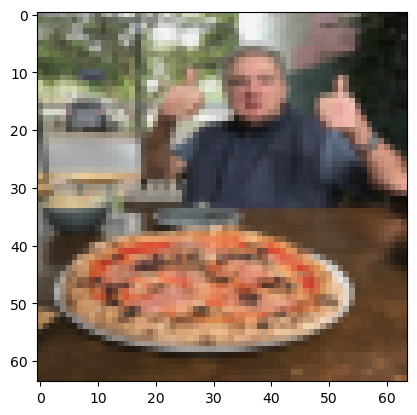

In [204]:
transformed_img = custom_img_transform(custom_img)
plt.imshow(transformed_img.permute(1,2,0))

In [210]:
transformed_unsqueezed_img = custom_img_transform(custom_img).unsqueeze(0)
transformed_unsqueezed_img.shape

torch.Size([1, 3, 64, 64])

In [216]:
# Predicting
model_1.eval()
with torch.inference_mode():
    prediction = model_1(transformed_unsqueezed_img.to(device))
prediction

tensor([[ 0.4744, -0.3530, -0.1297]], device='cuda:0')

In [218]:
class_names

['pizza', 'steak', 'sushi']

## Note: 

To make predictions on customs images it is necessary to:
- Load the image & turn it into a tensor
- Make sure the image is in the same datatype as the model (torch.float32)
- Make sure the image is in the same shape as the data was trained on (3x64x64) with a batch size . . . (1,3,64,64)
- Make sure the image is in the same device as the model (GPU)

In [221]:
# Converting logits -> prediction probabilities
prediction_prob = torch.softmax(prediction, dim=1)
prediction_prob

tensor([[0.5041, 0.2204, 0.2755]], device='cuda:0')

In [ ]:
# Convert pred probs -> pred labels


In [231]:
prediction_label = torch.argmax(prediction_prob, dim=1).cpu()
prediction_label

tensor([0])

In [229]:
class_names[prediction_label]

'pizza'

### 11.3 Functionizing

In [238]:
def pred_and_plot_img(model: torch.nn.Module,
                     image_path: str,
                     class_names: List[str] = None,
                     transform = None,
                     device = device):
    # Loading & normalizing the image data
    target_img = torchvision.io.read_image(str(image_path)).type(torch.float32) / 255.
    # transform if necessary
    if transform:
        target_img = transform(target_img)

    model.to(device)
    model.eval()
    with torch.inference_mode():
        # Adding a batch dimension
        target_img = target_img.unsqueeze(0)
        target_img_pred = model(target_img.to(device))
    # Logits -> Prediction probabilities
    prediction_prob = torch.softmax(target_img_pred, dim=1)
    # Prediction probabilities -> prediction labels
    prediction_label = torch.argmax(prediction_prob, dim=1)
    # Plot the image alongside the prediction & prediction probability
    plt.imshow(target_img.squeeze().permute(1,2,0)) # remove batch dimension & rearrange shape to be HWC
    if class_names:
        title = f"Pred: {class_names[prediction_label.cpu()]} | Prob: {prediction_prob.max().cpu():.3f}"
    else:
        title = f"Pred: {prediction_label} | Prob: {prediction_prob.max().cpu():.3f}"
    plt.title(title)
    plt.axis(False)

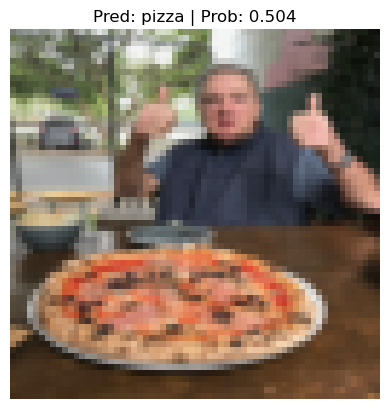

In [244]:
pred_and_plot_img(model_1, custom_img_path, class_names, custom_img_transform, device)